Customer 1 vs 2

Plain Contract

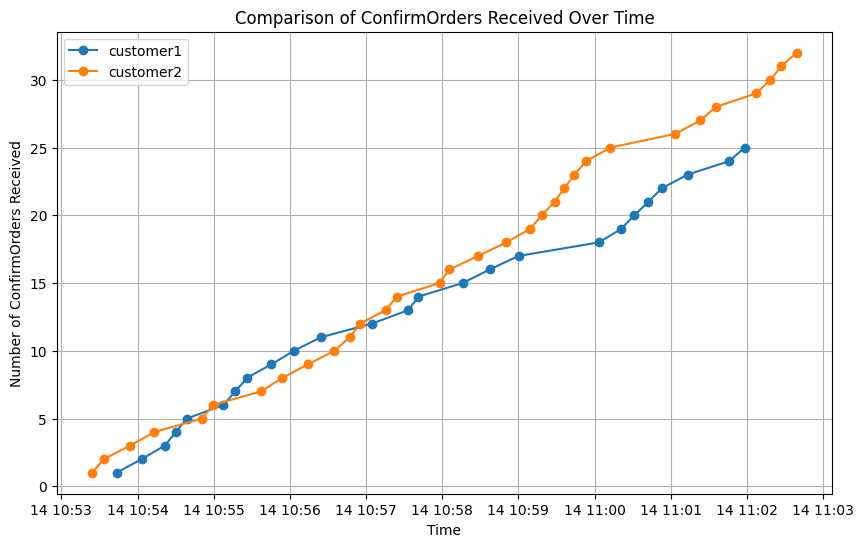

In [40]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Load the JSON data from a file
with open('logs.json', 'r') as file:
  data = json.load(file)

# Initialize data containers
timestamps_customer1 = []
timestamps_customer2 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        timestamp = datetime.fromisoformat(entry['timestamp'].replace('Z', '+00:00'))  # Convert timestamp to datetime

        if receiver == "customer1":
            timestamps_customer1.append(timestamp)
        elif receiver == "customer2":
            timestamps_customer2.append(timestamp)

# Sort timestamps
timestamps_customer1.sort()
timestamps_customer2.sort()

# Create line data for the plot
x_customer1 = [ts for ts in timestamps_customer1]
y_customer1 = list(range(1, len(timestamps_customer1) + 1))

x_customer2 = [ts for ts in timestamps_customer2]
y_customer2 = list(range(1, len(timestamps_customer2) + 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_customer1, y_customer1, label="customer1", marker='o')
plt.plot(x_customer2, y_customer2, label="customer2", marker='o')

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Number of ConfirmOrders Received")
plt.title("Comparison of ConfirmOrders Received Over Time")
plt.legend()
plt.grid()

# Display the plot
plt.show()

Ordering Contract

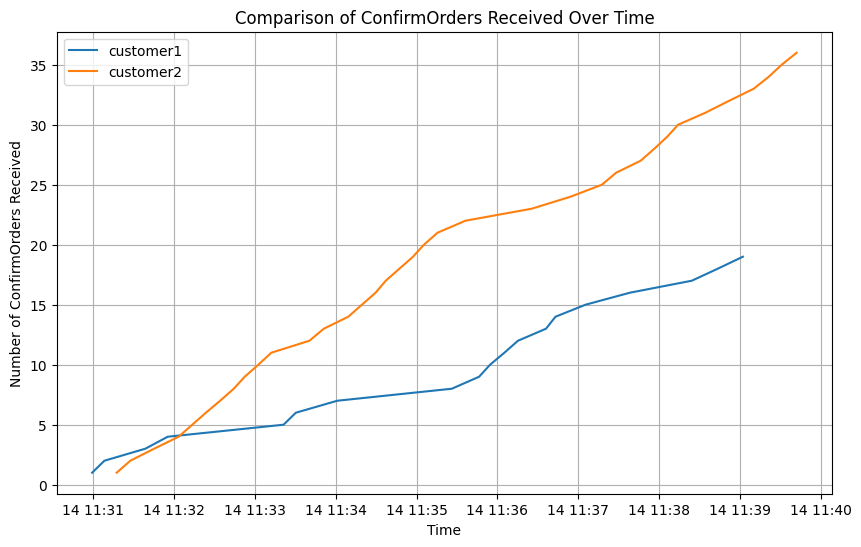

In [66]:
import json
import matplotlib.pyplot as plt
from datetime import datetime

# Load the JSON data from a file
with open('logs.json', 'r') as file:
  data = json.load(file)

# Initialize data containers
timestamps_customer1 = []
timestamps_customer2 = []

# Process the data to extract relevant information
for entry in data[:2505]:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        timestamp = datetime.fromisoformat(entry['timestamp'].replace('Z', '+00:00'))  # Convert timestamp to datetime

        if receiver == "customer1":
            timestamps_customer1.append(timestamp)
        elif receiver == "customer2":
            timestamps_customer2.append(timestamp)

# Sort timestamps
timestamps_customer1.sort()
timestamps_customer2.sort()

# Create line data for the plot
x_customer1 = [ts for ts in timestamps_customer1]
y_customer1 = list(range(1, len(timestamps_customer1) + 1))

x_customer2 = [ts for ts in timestamps_customer2]
y_customer2 = list(range(1, len(timestamps_customer2) + 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_customer1, y_customer1, label="customer1")
plt.plot(x_customer2, y_customer2, label="customer2")

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Number of ConfirmOrders Received")
plt.title("Comparison of ConfirmOrders Received Over Time")
plt.legend()
plt.grid()

# Display the plot
plt.show()

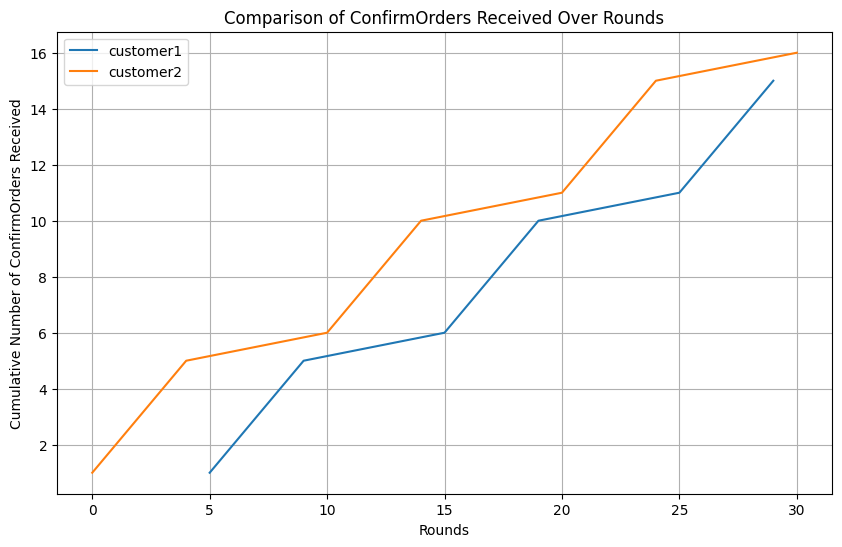

In [108]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()

# print(rounds_customer2)

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []

cumsum1 = 0
cumsum2 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_customer1, cumulative_y_customer1, label="customer1")
plt.plot(x_customer2, cumulative_y_customer2, label="customer2")

# Add labels, legend, and title
plt.xlabel("Rounds")
plt.ylabel("Cumulative Number of ConfirmOrders Received")
plt.title("Comparison of ConfirmOrders Received Over Rounds")
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [64]:
len(data)

460

Retailer 1 vs 2

Plain Contract

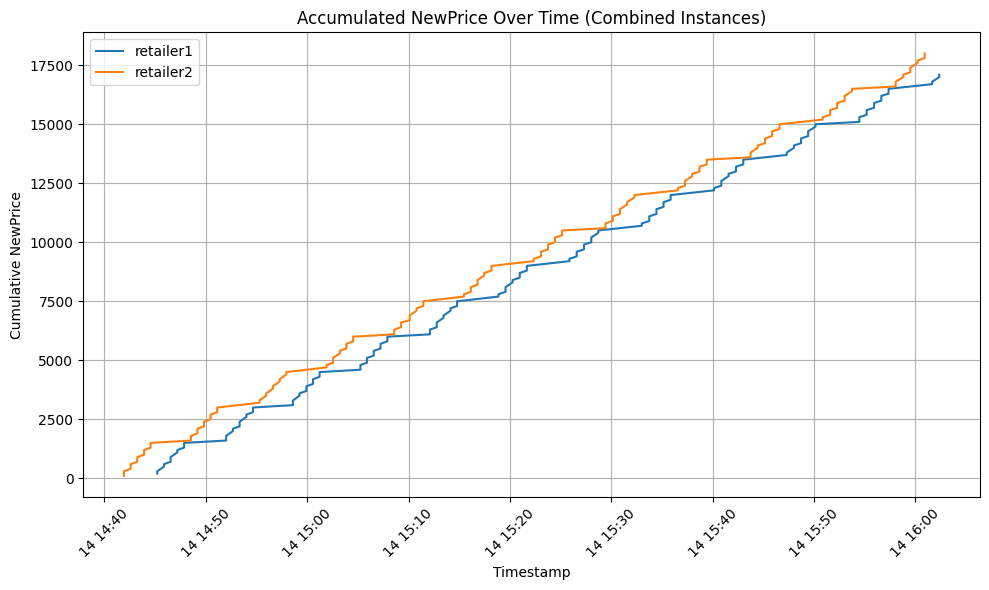

In [123]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load data from log.json
with open("logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        timestamp = entry["timestamp"]
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Timestamp": pd.to_datetime(timestamp)})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "retailer1", "3": "retailer1", "2": "retailer2", "4": "retailer2"})

# Sort data by timestamp
df.sort_values("Timestamp", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby(["CombinedInstanceID"])["NewPrice"].cumsum()

# Plot the data
plt.figure(figsize=(10, 6))
for combined_id, group in df.groupby("CombinedInstanceID"):
    plt.plot(group["Timestamp"], group["CumulativePrice"], label=f"{combined_id}")

plt.title("Accumulated NewPrice Over Time (Combined Instances)")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative NewPrice")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ordering Contract

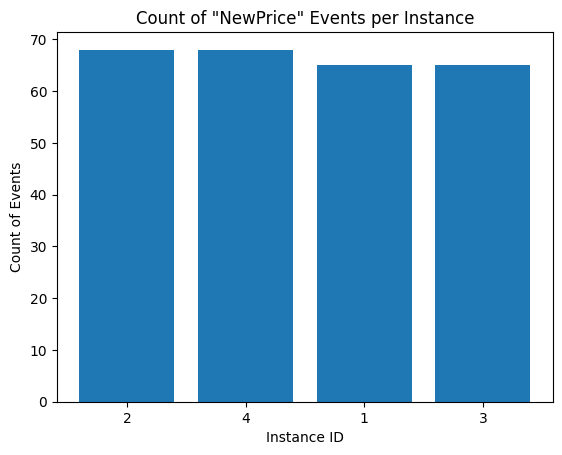

In [140]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load data from log.json
with open('logs.json', 'r') as file:
    events = json.load(file)

# Count occurrences of "NewPrice" for each instance
instance_counts = Counter(event["data"]["instanceID"] for event in events if event["event"] == "NewPrice")

# Plotting
plt.bar(instance_counts.keys(), instance_counts.values())
plt.title('Count of "NewPrice" Events per Instance')
plt.xlabel('Instance ID')
plt.ylabel('Count of Events')
plt.show()

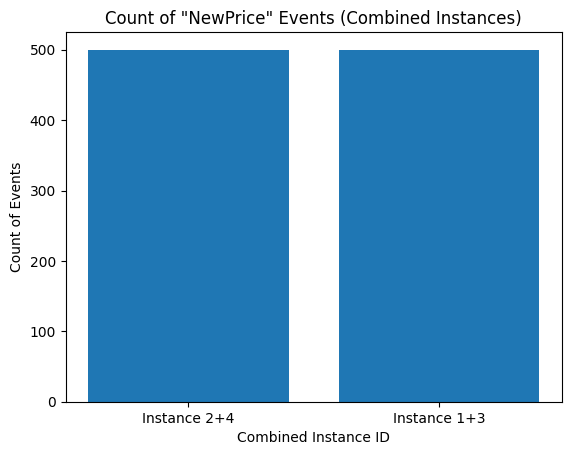

In [13]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load data from log.json
with open('logs.json', 'r') as file:
    events = json.load(file)

# Count occurrences of "NewPrice" for each instance
instance_counts = Counter(event["data"]["instanceID"] for event in events if event["event"] == "NewPrice")

# Combine instance counts: 2 and 4, 1 and 3
combined_counts = Counter()
combined_counts["Instance 2+4"] = instance_counts.get("2", 0) + instance_counts.get("4", 0)
combined_counts["Instance 1+3"] = instance_counts.get("1", 0) + instance_counts.get("3", 0)

# Plotting
plt.bar(combined_counts.keys(), combined_counts.values())
plt.title('Count of "NewPrice" Events (Combined Instances)')
plt.xlabel('Combined Instance ID')
plt.ylabel('Count of Events')
plt.show()


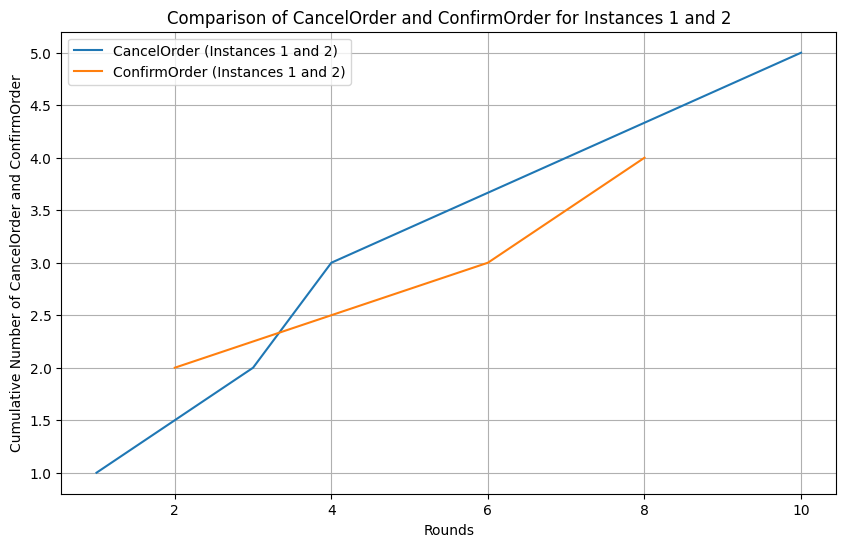

In [207]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_cancelorder = []
rounds_confirmorder = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        round_number = entry['round']  # Use the round information

        if instance_id in ["1","3"]:
            if entry['data']['taskName'] == "CancelOrder":
                rounds_cancelorder.append(round_number)
            elif entry['data']['taskName'] == "ConfirmRestock":
                rounds_confirmorder.append(round_number)

# Sort rounds
rounds_cancelorder.sort()
rounds_confirmorder.sort()

# Create line data for the plot
x_cancelorder = sorted(set(rounds_cancelorder))
y_cancelorder = [rounds_cancelorder.count(r) for r in x_cancelorder]

x_confirmorder = sorted(set(rounds_confirmorder))
y_confirmorder = [rounds_confirmorder.count(r) for r in x_confirmorder]

# Accumulate counts to show the cumulative count of CancelOrder and ConfirmOrder
cumulative_y_cancelorder = []
cumulative_y_confirmorder = []

cumsum_cancel = 0
cumsum_confirm = 0

for y in y_cancelorder:
    cumsum_cancel += y
    cumulative_y_cancelorder.append(cumsum_cancel)

for y in y_confirmorder:
    cumsum_confirm += y
    cumulative_y_confirmorder.append(cumsum_confirm)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x_cancelorder, cumulative_y_cancelorder, label="CancelOrder (Instances 1 and 2)")
plt.plot(x_confirmorder, cumulative_y_confirmorder, label="ConfirmOrder (Instances 1 and 2)")

# Add labels, legend, and title
plt.xlabel("Rounds")
plt.ylabel("Cumulative Number of CancelOrder and ConfirmOrder")
plt.title("Comparison of CancelOrder and ConfirmOrder for Instances 1 and 2")
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [158]:
import json

# Load the JSON data from a file
with open('logs.json', 'r') as file:
    data = json.load(file)

# Initialize counters
cancelorder_count = 0
confirmorder_count = 0

# Process the data to count ConfirmOrder and CancelOrder for instances 1 and 2
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] in ["CancelOrder", "ConfirmRestock"]:
        instance_id = entry['data']['instanceID']
        if instance_id in ["1", "2"]:
            if entry['data']['taskName'] == "CancelOrder":
                cancelorder_count += 1
            elif entry['data']['taskName'] == "ConfirmRestock":
                confirmorder_count += 1

# Print the results
print(f"CancelOrder Count (Instances 1 and 2): {cancelorder_count}")
print(f"ConfirmOrder Count (Instances 1 and 2): {confirmorder_count}")


CancelOrder Count (Instances 1 and 2): 70
ConfirmOrder Count (Instances 1 and 2): 71


In [146]:
import csv

# Initialize counters
cancelorder_count = 0
confirmorder_count = 0

# Process the CSV data to count ConfirmOrder and CancelOrder for instances 1 and 2
with open('discoLog.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        event = row['event']
        instance_id = row['instanceID']
        if event in ["CancelOrder", "ConfirmOrder"] and instance_id in ["1", "2"]:
            if event == "CancelOrder":
                cancelorder_count += 1
            elif event == "ConfirmOrder":
                confirmorder_count += 1

# Print the results
print(f"CancelOrder Count (Instances 1 and 2): {cancelorder_count}")
print(f"ConfirmOrder Count (Instances 1 and 2): {confirmorder_count}")

CancelOrder Count (Instances 1 and 2): 66
ConfirmOrder Count (Instances 1 and 2): 133


In [201]:
import json

# Load the JSON file
with open('domains.json', 'r') as file:
    data = json.load(file)

# Count the number of unique addresses in each domain
for domain in data:
    domain_id = domain[0]  # Domain ID
    addresses = domain[2]  # List of addresses
    if(len(addresses) < 4):
        unique_addresses = set(addresses)  # Use a set to find unique addresses
        print(f"Domain {domain_id} has {len(unique_addresses)} unique addresses.")


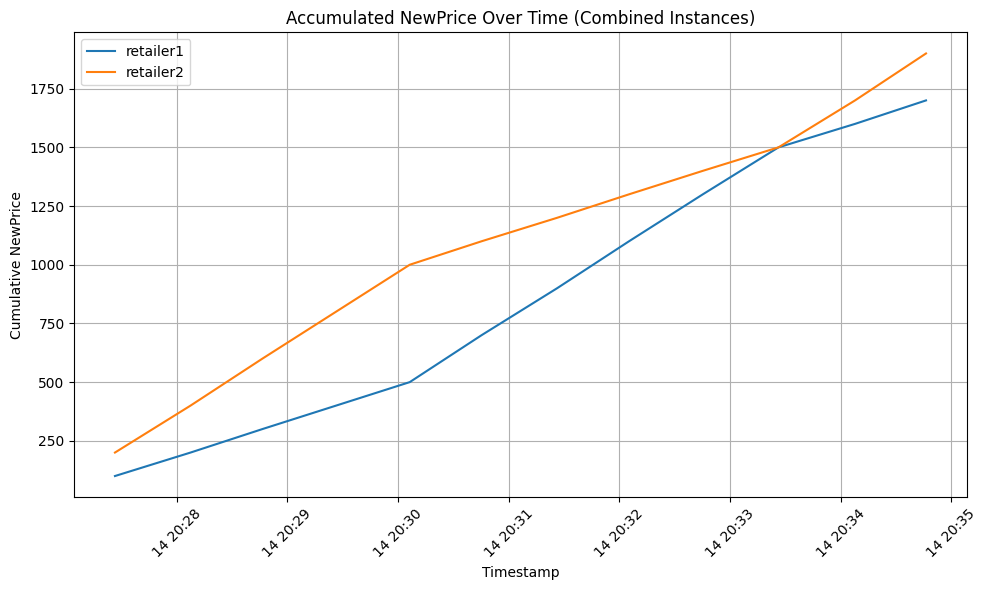

In [208]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load data from log.json
with open("logs.json", "r") as file:
    logs = json.load(file)

# Extract relevant data
new_price_data = []
for entry in logs:
    if entry["event"] == "NewPrice":
        instance_id = entry["data"]["instanceID"]
        new_price = int(entry["data"]["newPrice"])
        timestamp = entry["timestamp"]
        new_price_data.append({"InstanceID": instance_id, "NewPrice": new_price, "Timestamp": pd.to_datetime(timestamp)})

# Convert to a DataFrame
df = pd.DataFrame(new_price_data)

# Combine instances 1 and 3, and 2 and 4
df["CombinedInstanceID"] = df["InstanceID"].replace({"1": "retailer1", "2": "retailer1", "3": "retailer2", "4": "retailer2"})

# Sort data by timestamp
df.sort_values("Timestamp", inplace=True)

# Accumulate NewPrice over time for each combined group
df["CumulativePrice"] = df.groupby(["CombinedInstanceID"])["NewPrice"].cumsum()

# Plot the data
plt.figure(figsize=(10, 6))
for combined_id, group in df.groupby("CombinedInstanceID"):
    plt.plot(group["Timestamp"], group["CumulativePrice"], label=f"{combined_id}")

plt.title("Accumulated NewPrice Over Time (Combined Instances)")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative NewPrice")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


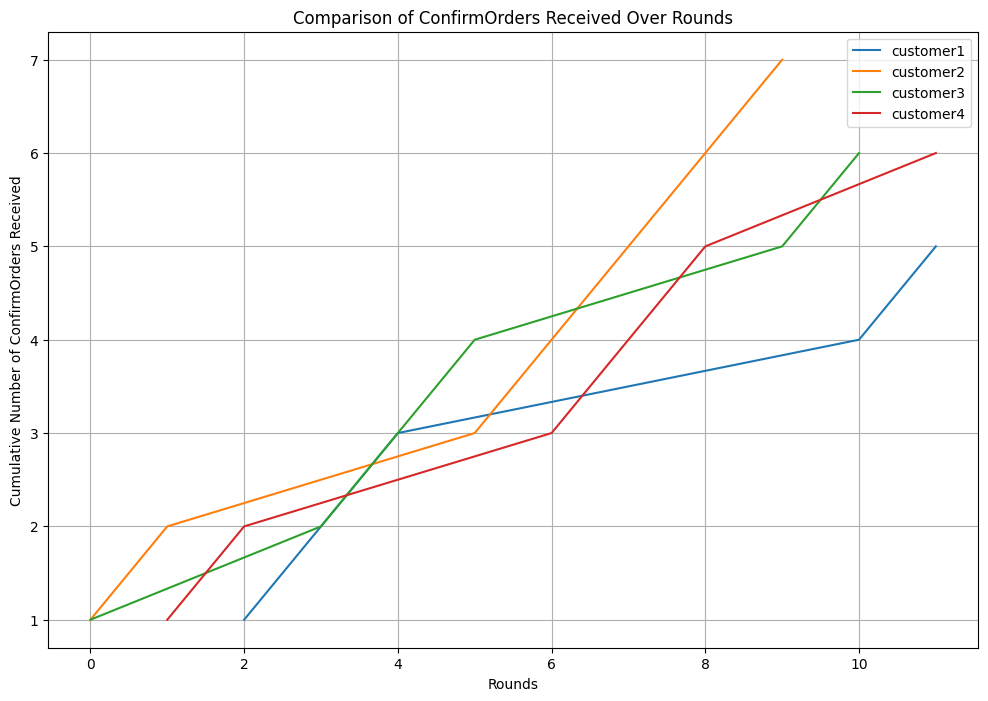

In [210]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []
cumulative_y_customer3 = []
cumulative_y_customer4 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)

for y in y_customer3:
    cumsum3 += y
    cumulative_y_customer3.append(cumsum3)

for y in y_customer4:
    cumsum4 += y
    cumulative_y_customer4.append(cumsum4)

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(x_customer1, cumulative_y_customer1, label="customer1")
plt.plot(x_customer2, cumulative_y_customer2, label="customer2")
plt.plot(x_customer3, cumulative_y_customer3, label="customer3")
plt.plot(x_customer4, cumulative_y_customer4, label="customer4")

# Add labels, legend, and title
plt.xlabel("Rounds")
plt.ylabel("Cumulative Number of ConfirmOrders Received")
plt.title("Comparison of ConfirmOrders Received Over Rounds")
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data from a file
with open('logs.json', 'r') as file:
    data = json.load(file)

# Initialize data containers
rounds_customer1 = []
rounds_customer2 = []
rounds_customer3 = []
rounds_customer4 = []

# Process the data to extract relevant information
for entry in data:
    if entry['event'] == "TaskCompleted" and entry['data']['taskName'] == "ConfirmOrder":
        receiver = entry['data']['receiver']
        round_number = entry['round']  # Use the round information

        if receiver == "customer1":
            rounds_customer1.append(round_number)
        elif receiver == "customer2":
            rounds_customer2.append(round_number)
        elif receiver == "customer3":
            rounds_customer3.append(round_number)
        elif receiver == "customer4":
            rounds_customer4.append(round_number)

# Sort rounds
rounds_customer1.sort()
rounds_customer2.sort()
rounds_customer3.sort()
rounds_customer4.sort()

# Create line data for the plot
x_customer1 = sorted(set(rounds_customer1))
y_customer1 = [rounds_customer1.count(r) for r in x_customer1]

x_customer2 = sorted(set(rounds_customer2))
y_customer2 = [rounds_customer2.count(r) for r in x_customer2]

x_customer3 = sorted(set(rounds_customer3))
y_customer3 = [rounds_customer3.count(r) for r in x_customer3]

x_customer4 = sorted(set(rounds_customer4))
y_customer4 = [rounds_customer4.count(r) for r in x_customer4]

# Accumulate counts to show the cumulative count of ConfirmOrders
cumulative_y_customer1 = []
cumulative_y_customer2 = []

cumsum1 = 0
cumsum2 = 0
cumsum3 = 0
cumsum4 = 0

for y in y_customer1:
    cumsum1 += y
    cumulative_y_customer1.append(cumsum1)

for y in y_customer2:
    cumsum2 += y
    cumulative_y_customer2.append(cumsum2)


# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(x_customer1, cumulative_y_customer1, label="customer1")
plt.plot(x_customer2, cumulative_y_customer2, label="customer2")

# Add labels, legend, and title
plt.xlabel("Rounds")
plt.ylabel("Cumulative Number of ConfirmOrders Received")
plt.title("Comparison of ConfirmOrders Received Over Rounds")
plt.legend()
plt.grid()

# Display the plot
plt.show()
